In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [20]:
 class Graph:
  def loadGraphFromFile(self, pathToXml):
    self.nodes = dict()
    self.edges = dict()
    self.reversedEdges = dict()

    tree = ET.parse(pathToXml)
    root = tree.getroot()
    index = 0
    children = root.getchildren()

    for entry in children[0]:
      if "node" not in entry.tag:
        source = entry.attrib["source"]
        target = entry.attrib["target"]
        self.edges[self.nodes[source]].append(self.nodes[target])
        self.reversedEdges[self.nodes[target]].append(self.nodes[source])
      else:
        self.nodes[entry.attrib["id"]] = index
        self.edges[index] = []
        self.reversedEdges[index] = []
        index += 1
        
    self.roots = []
    for node in self.nodes.values():
      if len(self.edges[node]) > 0 and len(self.reversedEdges[node]) == 0:
        self.roots.append(node)


In [21]:
def nextNode(graph, node, coords, shifts):
  coords[node] = (0,0)
  shifts[node] = (0,0)
  
  if len(graph.edges[node]) == 0:
    return (0,0)
  
  childrenAreas = []
  for i, child in enumerate(graph.edges[node]):
    if i == 2:
      break
    area = nextNode(graph, child, coords, shifts)
    childrenAreas.append(area)
  
  if len(childrenAreas) == 1:
    shifts[graph.edges[node][0]] = (1,0)
    return (childrenAreas[0][0] + 1, childrenAreas[0][1])
  else:
    horizontal = (childrenAreas[0][0] + childrenAreas[1][0] + 1) * max(childrenAreas[0][1] + 1, childrenAreas[1][1])
    vertical = (childrenAreas[0][1] + childrenAreas[1][1] + 1) * max(childrenAreas[0][0] + 1, childrenAreas[1][0])

    if horizontal < vertical:
      shifts[graph.edges[node][0]] = (0,1)
      shifts[graph.edges[node][1]] = (1 + childrenAreas[0][0], 0)
      return (childrenAreas[0][0] + childrenAreas[1][0] + 1, max(childrenAreas[0][1] + 1, childrenAreas[1][1]))
    else:
      shifts[graph.edges[node][0]] = (1,0)
      shifts[graph.edges[node][1]] = (0, childrenAreas[0][1] + 1)
      return (max(childrenAreas[0][0] + 1, childrenAreas[1][0]), childrenAreas[0][1] + childrenAreas[1][1] + 1)

def printGraph(graph, node, coords, shifts, prevShift=(0,0)):
  shifts[node] = (shifts[node][0] + prevShift[0], shifts[node][1] + prevShift[1])
  coords[node] = (coords[node][0] + shifts[node][0], coords[node][1] + shifts[node][1])

  for i, child in enumerate(graph.edges[node]):
    if i == 2:
      break
    printGraph(graph, child, coords, shifts, shifts[node])
    plt.plot([coords[node][0] - coords[node][1], coords[child][0] - coords[child][1]],\
             [-coords[node][1] - coords[node][0], -coords[child][1] - coords[child][0]],\
             color="red")
    plt.scatter([coords[node][0] - coords[node][1], coords[child][0] - coords[child][1]],\
                [-coords[node][1] - coords[node][0], -coords[child][1] - coords[child][0]],\
                color="red")

def createHV(graph):
  coords = dict()
  shifts = dict()
  nextNode(graph, graph.roots[0], coords, shifts)
  printGraph(graph, graph.roots[0], coords, shifts)

In [22]:
def drawGraph(pathToGraph):
  graph = Graph()
  graph.loadGraphFromFile(pathToGraph)
  createHV(graph)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  # Remove the CWD from sys.path while we load stuff.


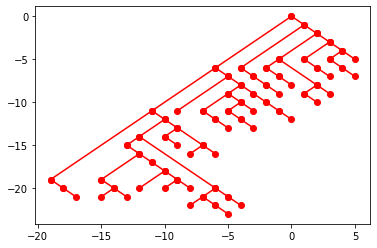

In [23]:
drawGraph("./test1.xml")